# **Hierarchical Clustering**
**Elaborated By: Sirine MAAROUFI**


---
## **Introduction**

---
In this exercice, we aim to automatically categorize a set of cheeses based on their characteristics. The goal is to identify homogeneous groups of cheeses that share similar properties. To achieve this, we will use hierarchical clustering (classification ascendante hiérarchique - CAH). 
The dataset consists of 29 observations described by several quantitative variables, which are available in the file "fromage.txt". We will proceed with the following steps:
1. Import the dataset.
 2. Explore the dataset: find its dimensions, the number of variables, and their names.
3. Determine the range (intervalle de variation) of each variable.
4. Normalize the data to a [0, 1] range and discuss why this step is important.
5. Perform hierarchical clustering using different aggregation methods and visualize the dendrograms.
6. Analyze the dendrograms to determine the optimal number of clusters.
7. Perform hierarchical clustering with a specified number of clusters and visualize the results.

---

## **Step 1: Importing Libraries**
---

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns


---
## **Step 2: Importing the Dataset**
---

In [28]:
# Load the dataset
data = pd.read_csv("fromage.txt", sep="\t", header = 0, index_col=0)

In [29]:
# Display the first few rows of the dataset
data.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


---
## **Step 3: Exploring the Dataset**
---
We start by examining the dataset's dimensions and variables.




In [30]:
# Display the dimensions of the dataset
print("Dimensions of the dataset: ", data.shape)

# The number of variables is given by the number of columns
num_variables = data.shape[1]
print("Number of variables: ", num_variables)

Dimensions of the dataset:  (29, 9)
Number of variables:  9


In [31]:
# Display the names of the variables (columns)
print("Names of the variables: ", data.columns.tolist())

Names of the variables:  ['calories', 'sodium', 'calcium', 'lipides', 'retinol', 'folates', 'proteines', 'cholesterol', 'magnesium']


In [32]:
# Calculate the range of variation for each variable
range_of_variation = data.describe().loc[['min', 'max']]
range_of_variation

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
min,70.0,22.0,72.6,3.4,37.1,1.2,4.1,10.0,10.0
max,406.0,432.0,334.6,33.3,150.5,36.4,35.7,120.0,51.0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, CarredelEst to Yaourtlaitent.nat.
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   calories     29 non-null     int64  
 1   sodium       29 non-null     float64
 2   calcium      29 non-null     float64
 3   lipides      29 non-null     float64
 4   retinol      29 non-null     float64
 5   folates      29 non-null     float64
 6   proteines    29 non-null     float64
 7   cholesterol  29 non-null     int64  
 8   magnesium    29 non-null     int64  
dtypes: float64(6), int64(3)
memory usage: 2.3+ KB


---
## **Step 4: Data Normalization**
---
Normalization is essential as the variables are measured on different scales. Scaling data to a [0, 1] range ensures that no single feature dominates the distance calculations in clustering.



In [34]:
# Normalize the data to the range [0, 1]
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Convert the normalized data back to a DataFrame to retain variable names
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)

In [35]:
# Display the first few rows of the normalized dataset
data_normalized.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,0.726190,0.808537,0.000000,0.765886,0.127866,0.826705,0.534810,0.545455,0.243902
1,0.726190,0.526829,0.523664,0.725753,0.234568,0.147727,0.585443,0.545455,0.414634
2,0.985119,0.219512,0.712977,1.000000,0.156966,0.000000,0.712025,1.000000,0.756098
3,0.809524,0.765854,0.528626,0.852843,0.000000,0.747159,0.509494,0.727273,0.414634
4,0.577381,0.712195,0.546947,0.538462,0.581129,1.000000,0.610759,0.454545,0.243902


---
## **Step 5: Hierarchical Clustering - Dendrogram Visualization**
---
We explore four different linkage methods: Ward, Single, Complete, and Average. Each method calculates the distance between clusters in a unique way, affecting the structure of the dendrogram.


**Explanation of Linkage Methods:**
- **Ward's Method:** Minimizes the intra-cluster variance. Tends to create compact and well-separated clusters.

- **Single Linkage Method:** Uses the minimum distance between points in different clusters. Can form chains of clusters.

- **Complete Linkage Method:** Uses the maximum distance between points in different clusters. Tends to form compact clusters.

- **Average Linkage Method:** Uses the average distance between all points in different clusters. A middle ground between Single and Complete.

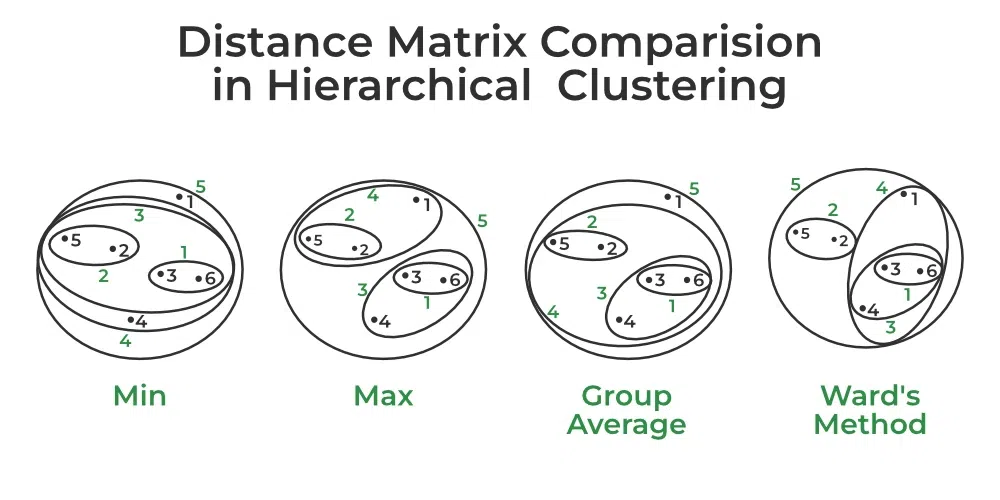

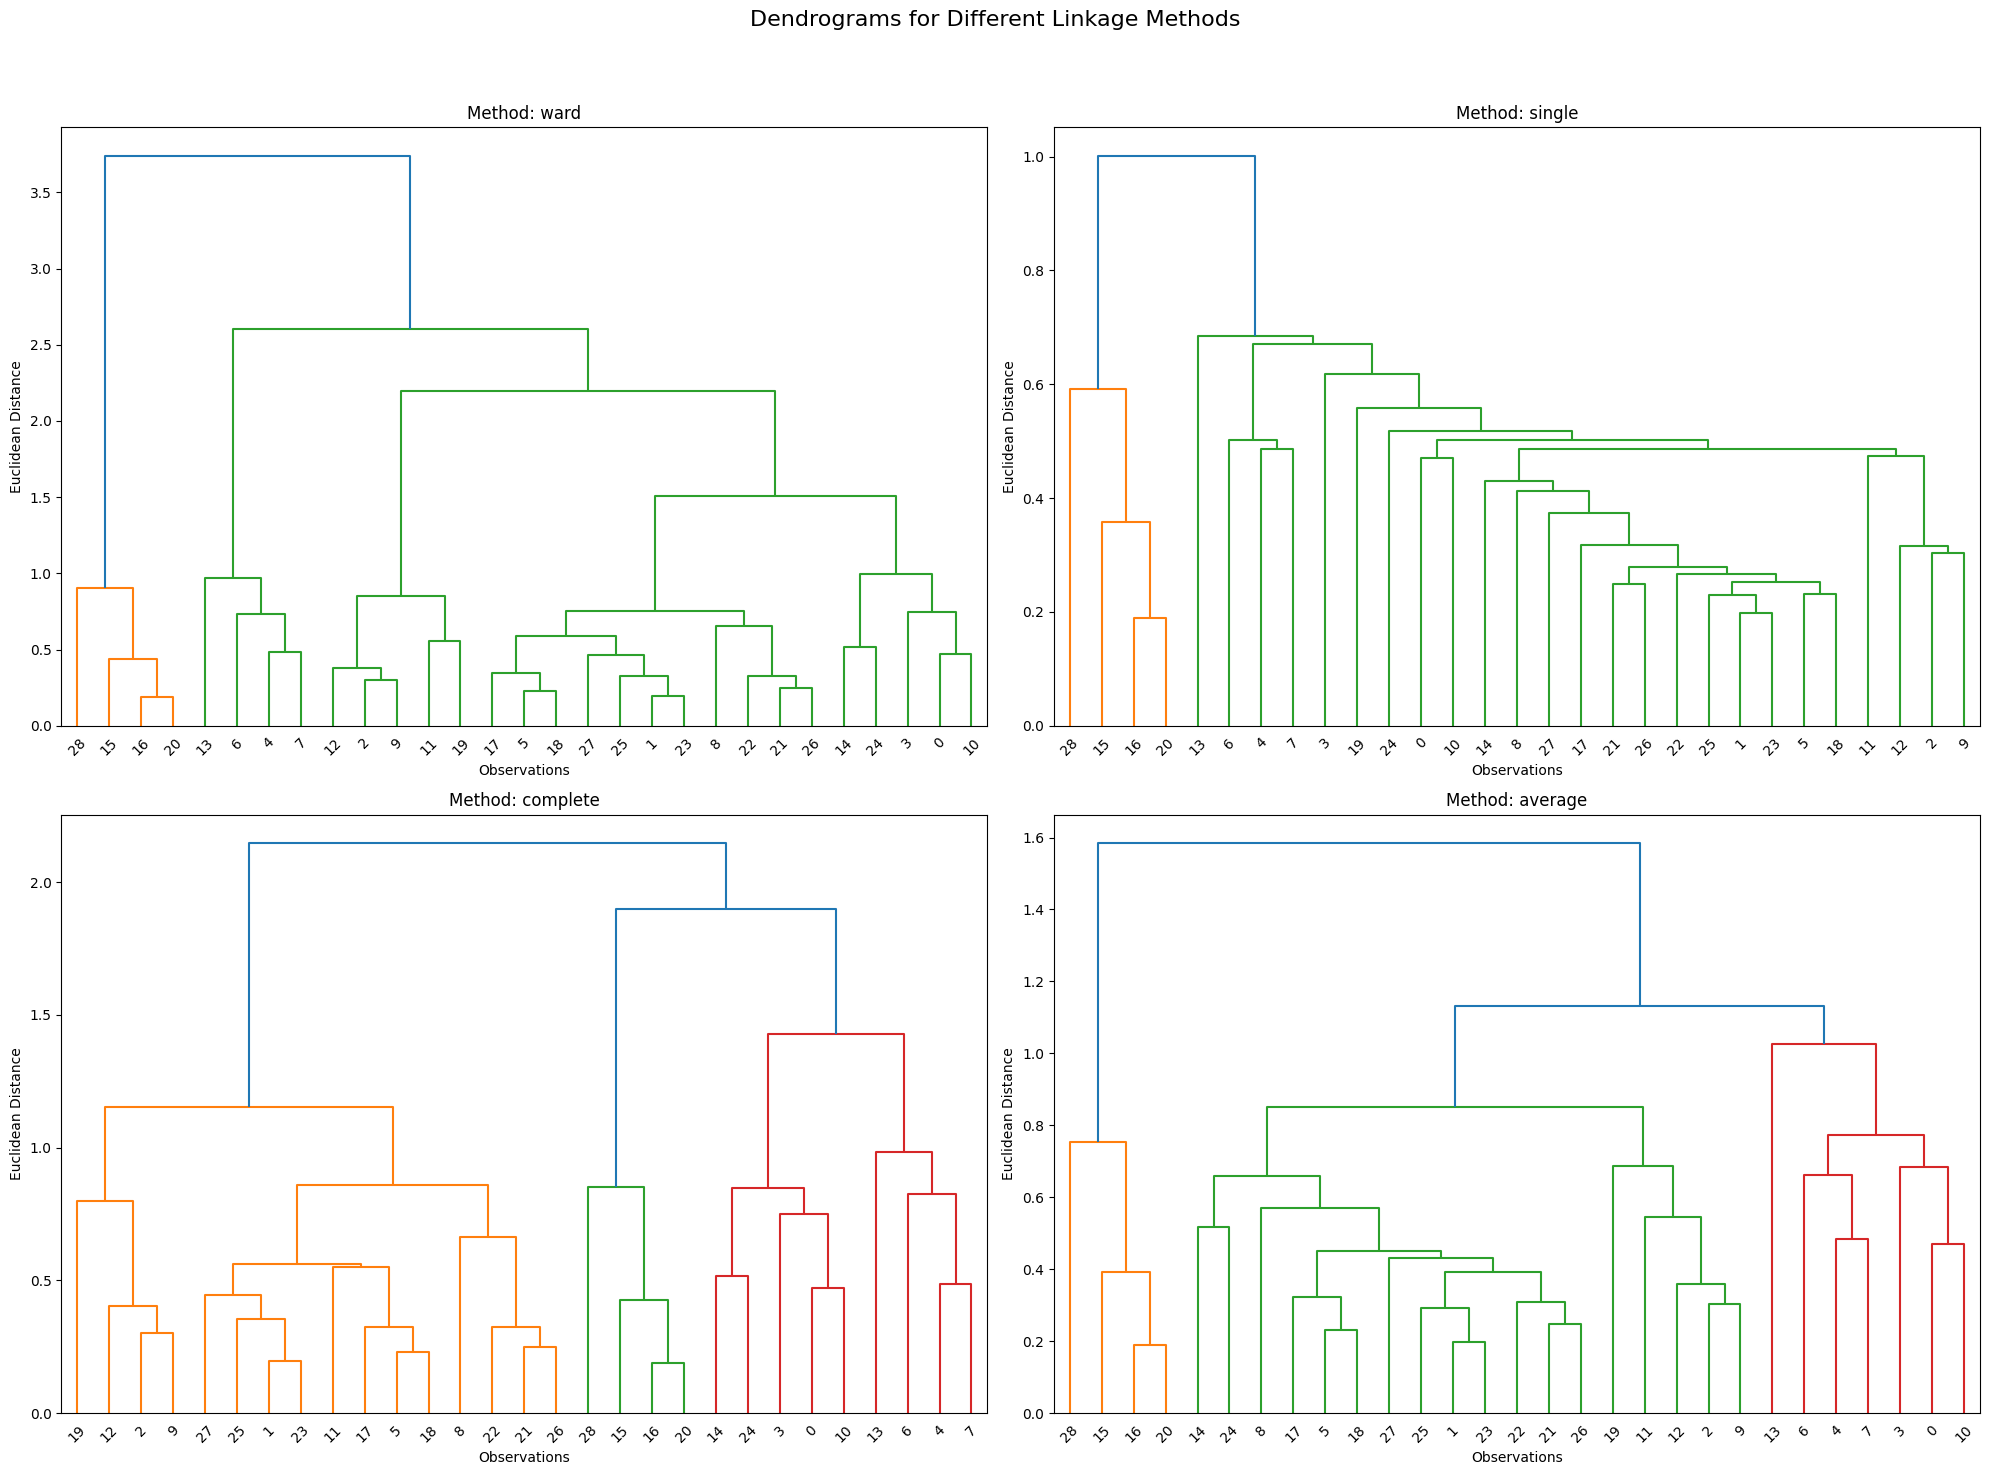

In [36]:
# Different linkage methods to be tested
methods = ["ward", "single", "complete", "average"]

# Create a grid of subplots for dendrograms
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle("Dendrograms for Different Linkage Methods", fontsize=16)

# Plot each dendrogram in a separate subplot
for ax, method in zip(axes.flat, methods):
    # Generate the linkage matrix
    linkage_matrix = sch.linkage(data_normalized, method=method, metric='euclidean')
    
    # Plot the dendrogram in the corresponding subplot
    sch.dendrogram(linkage_matrix, ax=ax)
    ax.set_title(f"Method: {method}")
    ax.set_xlabel("Observations")
    ax.set_ylabel("Euclidean Distance")

# Adjust layout for better appearance
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### **Analysis of Dendrograms**
- **Ward**: Shows well-separated clusters, suggesting an optimal number of clusters around 5.
- **Single**: Displays chain-like clustering, with an optimal number of clusters around 2.
- **Complete**: Forms compact clusters, with an optimal number of clusters around 5.
- **Average**: Provides intermediate clustering, suggesting 4 clusters as optimal.

---
## **Step 6:  Hierarchical Clustering with Specified Number of Clusters**
--- 
We now visualize clustering results using different methods and cluster numbers.
We will perform hierarchical clustering using the following criteria:
- **Variables**: Only the first and second attributes 
- **Distance**: Euclidean distance
- **Aggregation methods**: Ward's method, complete linkage, and average linkage
- **Number of clusters (k)**: Between 2 and 5

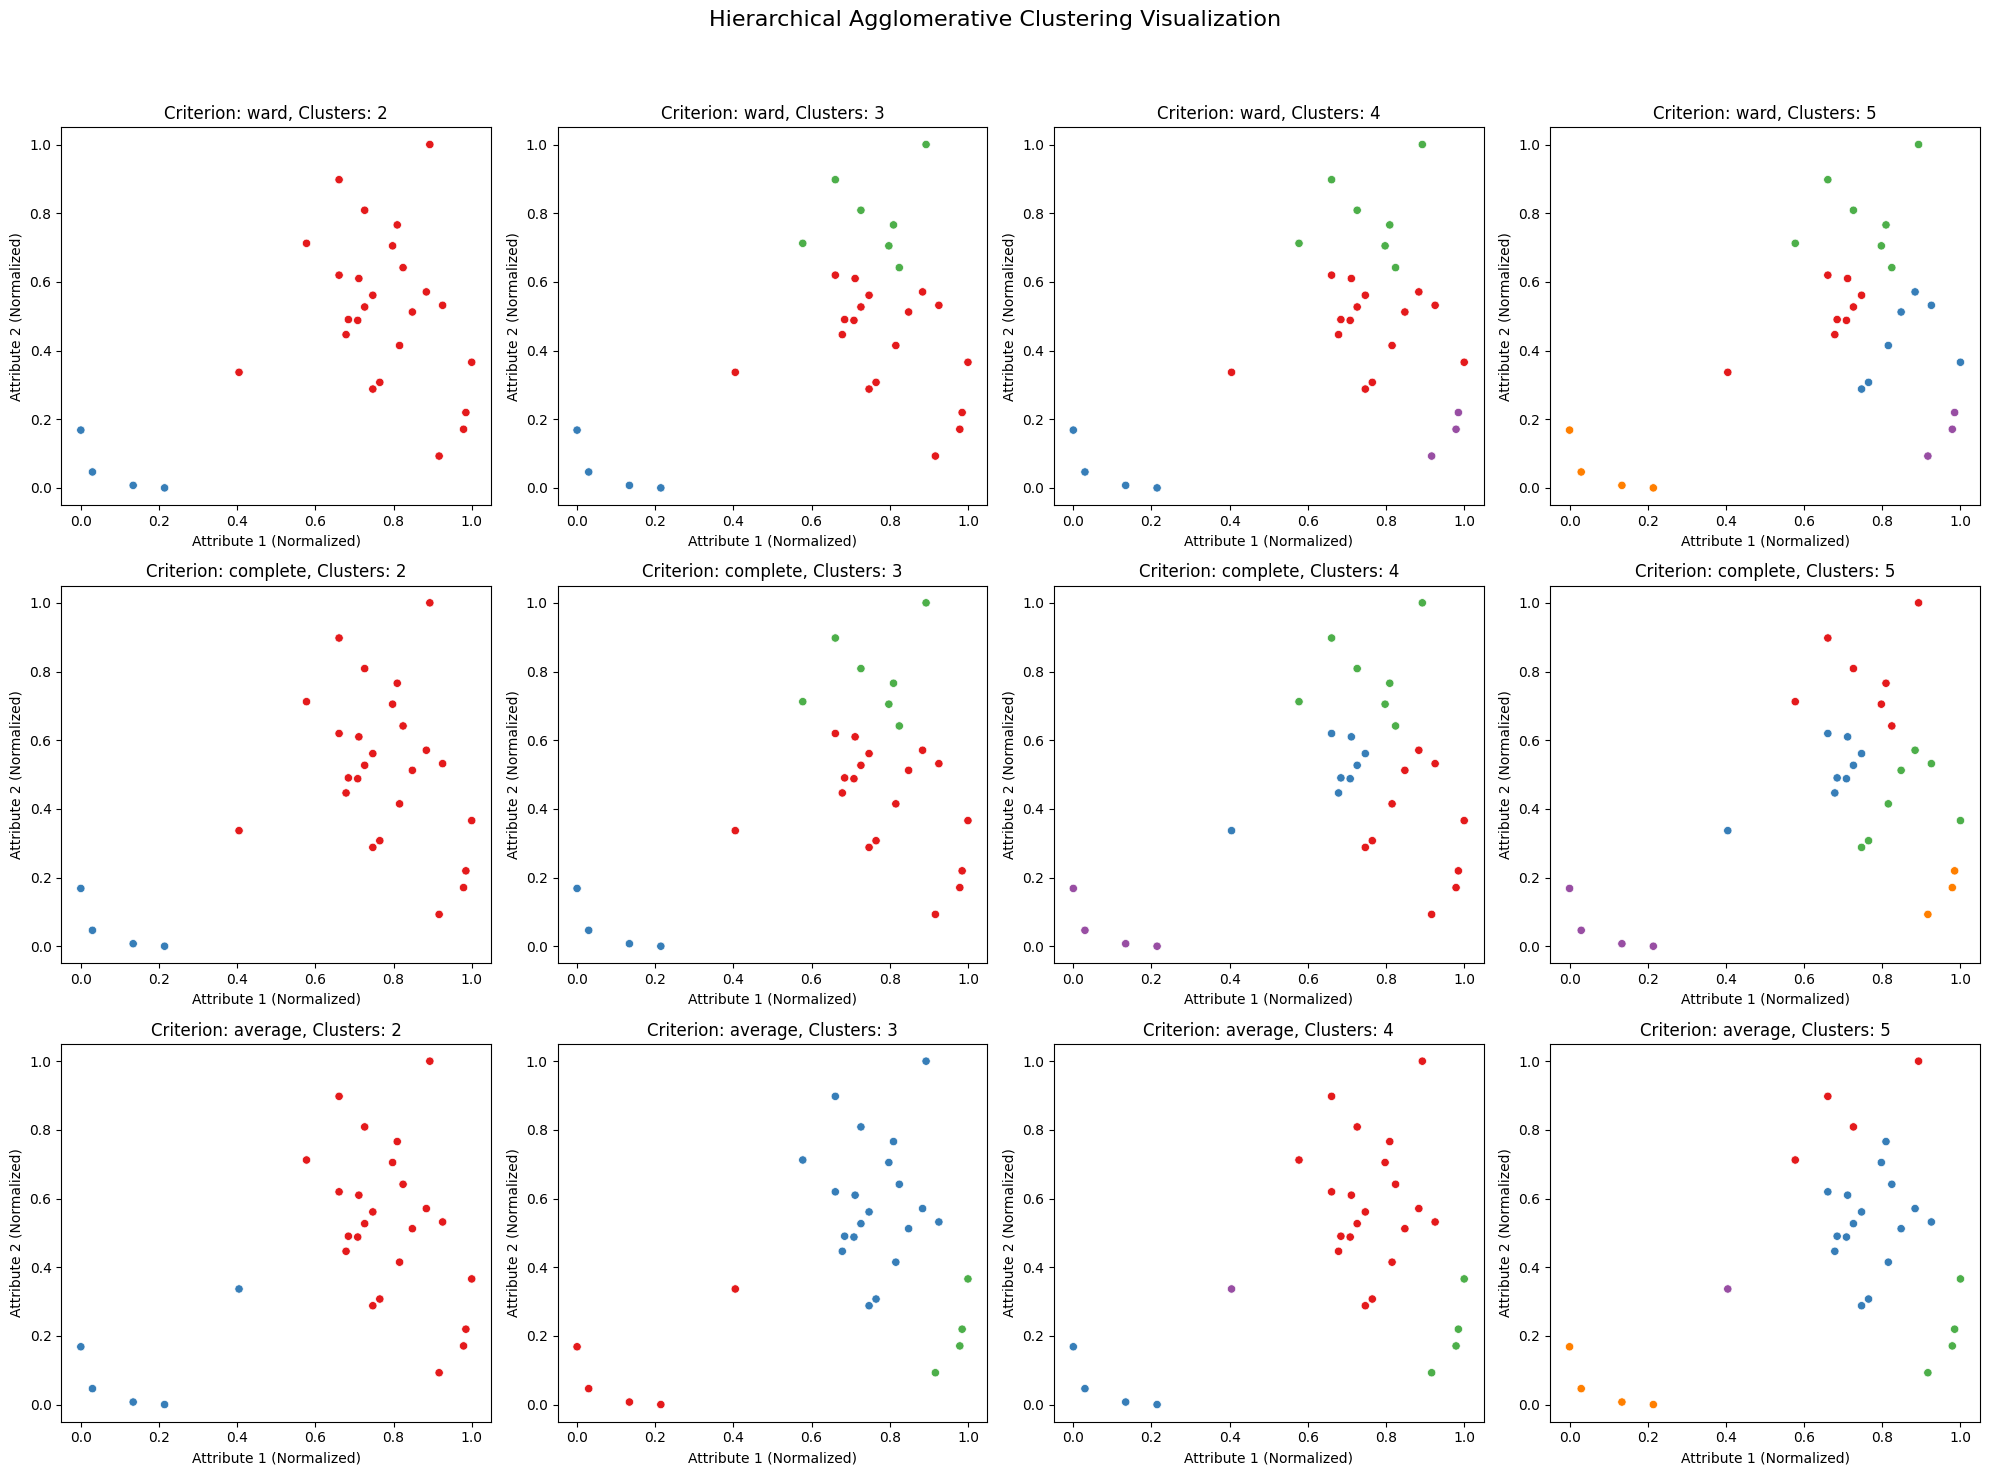

In [37]:
# Criteria to be used
criteria = ["ward", "complete", "average"]
cluster_range = range(2, 6)

# Create a grid of subplots
fig, axes = plt.subplots(len(criteria), len(cluster_range), figsize=(20, 15))
fig.suptitle("Hierarchical Agglomerative Clustering Visualization", fontsize=16)

# Visualize results for each criterion and number of clusters
for i, criterion in enumerate(criteria):
    for j, k in enumerate(cluster_range):
        # Perform hierarchical clustering
        clustering = AgglomerativeClustering(n_clusters=k, linkage=criterion)
        labels = clustering.fit_predict(data_normalized.iloc[:, :2])  # Only the first and second attributes

        # Plot in the corresponding subplot
        ax = axes[i, j]
        sns.scatterplot(x=data_normalized.iloc[:, 0], y=data_normalized.iloc[:, 1], hue=labels, palette='Set1', ax=ax, legend=None)
        ax.set_title(f"Criterion: {criterion}, Clusters: {k}")
        ax.set_xlabel("Attribute 1 (Normalized)")
        ax.set_ylabel("Attribute 2 (Normalized)")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### **Analysis of Hierarchical Clustering Visualizations**
---
These graphs represent the results of hierarchical clustering applied to a dataset, visualized for different criteria (Ward, Complete, Average) and different numbers of clusters (2, 3, 4, 5). Each point represents an observation, and the colors indicate the assignment to a cluster.

* **Axes**: The axes represent the normalized values of two attributes.

* **Colors**: Each color corresponds to a different cluster.

#### **Interpretation of the Results**
**Impact of Linkage Methods:**
- **Ward**: Clusters obtained with Ward's method tend to be more compact and spherical. Observations within the same cluster are generally closer to each other.
- **Complete**: The Complete method produces more elongated clusters. Observations in the same cluster can be more dispersed.
- **Average**: The Average method offers a compromise between the previous two, producing clusters of more variable shape.

**Impact of the Number of Clusters:**
- **2 Clusters**: The separation is generally clearer, but it may lack refinement for more complex data.
- **3, 4, 5 Clusters**: As the number of clusters increases, the internal structure of the data becomes more apparent, but the risk of overfitting also increases.

---
## **Conclusion**
---

In this exercise, we explored hierarchical clustering techniques to categorize a cheese dataset based on its characteristics.

 We:

- Preprocessed the dataset by normalization.
- Examined dendrograms to identify optimal clusters.
- Visualized results using different linkage methods and numbers of clusters.

**Key Takeaways:**
- **Ward's method** was most effective, with 5 clusters being ideal.
- **Single linkage** often led to chained clusters.
- **Complete and Average linkage** required careful cluster selection.

Hierarchical clustering proved valuable in uncovering dataset patterns, demonstrating the significance of parameter choices in clustering.

---
## **Refrences**
---
- [Hierarchical clustering explained](https://towardsdatascience.com/hierarchical-clustering-explained-e59b13846da8)
- [Hierarchical Clustering in Machine Learning](https://www.geeksforgeeks.org/hierarchical-clustering/)
